<a href="https://colab.research.google.com/github/sumalatha456/MINI_NLP-PROJECTS/blob/main/NLP_CLASSIFICATION_MODEL(EMOTION_CLASSIFICATION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLP CLASSIFICATION MODEL: EMOTION CLASSIFICATION
😠

In [1]:
import pandas as pd

In [2]:
import pandas as pd
df = pd.read_csv('emotion.csv')
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [4]:
df.shape

(16000, 2)

In [5]:
df.size

32000

In [6]:
df.isna().sum()# checking missing values


,0
text,0
label,0


In [7]:
df.label.value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


<Axes: xlabel='label', ylabel='count'>

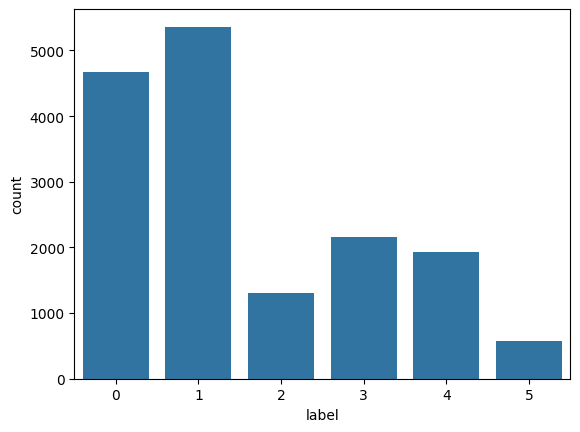

In [8]:
import seaborn as sns
sns.countplot(x = df.label, data = df)

In [9]:
#convert to lowercase
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,text,label
0,didnt feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,im grabbing minute post feel greedy wrong,3
3,ever feeling nostalgic fireplace know still pr...,2
4,feeling grouchy,3


In [12]:
!pip install textblob

In [13]:
import nltk
nltk.download('wordnet')

!python -m textblob.download_corpora

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [14]:
# Do lemmatization
from nltk.stem import WordNetLemmatizer
from textblob import Word
df ['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()


,text
0,didnt feel humiliated
1,go feeling hopeless damned hopeful around some...
2,im grabbing minute post feel greedy wrong
3,ever feeling nostalgic fireplace know still pr...
4,feeling grouchy


In [15]:

#separating  the data and label
X = df[['text']]
y = df['label']

In [20]:
 ##splitting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
print(x_train.shape, y_train.shape)

(12800, 1) (12800,)


In [22]:
print(x_test.shape, y_test.shape)

(3200, 1) (3200,)


In [43]:
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

In [44]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(x_train['text'])
x_train_tfidf = tfidf.transform(x_train['text'])
x_test_tfidf = tfidf.transform(x_test['text'])


##Model Building

In [29]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
pclf = PassiveAggressiveClassifier()
pclf.fit(x_train_tfidf, y_train)
pred = pclf.predict(x_test_tfidf)
print(metrics.classification_report(y_test, pred))
print("accuracy: ", accuracy_score(y_test, pred))


              precision    recall  f1-score   support

           0       0.92      0.91      0.91       946
           1       0.87      0.91      0.89      1021
           2       0.78      0.75      0.76       296
           3       0.85      0.85      0.85       427
           4       0.84      0.82      0.83       397
           5       0.83      0.72      0.77       113

    accuracy                           0.87      3200
   macro avg       0.85      0.83      0.84      3200
weighted avg       0.87      0.87      0.87      3200

accuracy:  0.86875


In [30]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)
pred = nb.predict(x_test_tfidf)
print(metrics.classification_report(y_test, pred))
print("accuracy: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       946
           1       0.60      0.99      0.75      1021
           2       1.00      0.03      0.06       296
           3       0.93      0.30      0.45       427
           4       0.91      0.23      0.37       397
           5       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.86      0.42      0.41      3200
weighted avg       0.76      0.66      0.59      3200

accuracy:  0.6634375


In [31]:
# @title Default title text
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_tfidf, y_train)
pred = rf.predict(x_test_tfidf)
print(metrics.classification_report(y_test, pred))
print("accuracy: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       946
           1       0.87      0.93      0.90      1021
           2       0.84      0.72      0.78       296
           3       0.88      0.87      0.87       427
           4       0.86      0.89      0.88       397
           5       0.85      0.70      0.77       113

    accuracy                           0.88      3200
   macro avg       0.87      0.84      0.85      3200
weighted avg       0.88      0.88      0.88      3200

accuracy:  0.8840625


In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_tfidf, y_train)
pred = lr.predict(x_test_tfidf)
print(metrics.classification_report(y_test, pred))
print("accuracy: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       946
           1       0.80      0.96      0.87      1021
           2       0.90      0.61      0.73       296
           3       0.90      0.81      0.85       427
           4       0.85      0.75      0.80       397
           5       0.86      0.45      0.59       113

    accuracy                           0.86      3200
   macro avg       0.87      0.75      0.79      3200
weighted avg       0.86      0.86      0.85      3200

accuracy:  0.8571875


In [34]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_tfidf, y_train)
pred = svc.predict(x_test_tfidf)
print(metrics.classification_report(y_test, pred))
print("accuracy: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       946
           1       0.79      0.96      0.87      1021
           2       0.88      0.55      0.68       296
           3       0.91      0.80      0.85       427
           4       0.85      0.75      0.80       397
           5       0.84      0.50      0.63       113

    accuracy                           0.85      3200
   macro avg       0.86      0.75      0.79      3200
weighted avg       0.86      0.85      0.84      3200

accuracy:  0.85


In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_tfidf, y_train)
pred = dt.predict(x_test_tfidf)
print(metrics.classification_report(y_test, pred))
print("accuracy: ", accuracy_score(y_test, pred))


              precision    recall  f1-score   support

           0       0.91      0.90      0.90       946
           1       0.88      0.89      0.88      1021
           2       0.80      0.76      0.78       296
           3       0.84      0.87      0.85       427
           4       0.82      0.87      0.84       397
           5       0.79      0.62      0.69       113

    accuracy                           0.86      3200
   macro avg       0.84      0.82      0.83      3200
weighted avg       0.86      0.86      0.86      3200

accuracy:  0.8646875


In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# Use x_train_tfidf instead of Xtrain_tfidf
gnb.fit(x_train_tfidf.toarray(), y_train) # GaussianNB requires dense array, convert using toarray()
pred = gnb.predict(x_test_tfidf.toarray()) # GaussianNB requires dense array, convert using toarray()
print(metrics.classification_report(y_test, pred))
print("accuracy: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.45      0.33      0.38       946
           1       0.55      0.38      0.45      1021
           2       0.24      0.37      0.29       296
           3       0.29      0.33      0.31       427
           4       0.26      0.38      0.31       397
           5       0.09      0.21      0.12       113

    accuracy                           0.35      3200
   macro avg       0.31      0.33      0.31      3200
weighted avg       0.40      0.35      0.37      3200

accuracy:  0.3515625
